In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import numpy as np
import json
from scipy.stats import linregress
from collections import Counter
from pprint import pprint
import itertools


In [2]:
# make paths and read csv raw data
data_path = "Resources/imdb.csv"

data = pd.read_csv(data_path)

In [3]:
data.head()

Unnamed: 0                          title    year            kind  \
0           0                Dinosaur Planet  2003.0  tv mini series   
1           1                      Character  2021.0           movie   
2           2              Get Up and Dance!  1994.0     video movie   
3           3  The Rise and Fall of El Chapo  2016.0        tv movie   
4           4                    Sick - IMDb     NaN             NaN   

                                    genre  rating   vote            country  \
0  ['Documentary', 'Animation', 'Family']     7.7  474.0  ['United States']   
1         ['Crime', 'Horror', 'Thriller']     8.3   46.0          ['Japan']   
2                              ['Family']     8.1   18.0  ['United States']   
3                         ['Documentary']     6.9   42.0  ['United States']   
4                            ['Thriller']     NaN    NaN  ['United States']   

       language  runtime                                               cast  \
0   ['English']   ['50']              ['Christian Slater', 'Scott Sampson']   
1  ['Japanese']  ['125']  ['Masaki Suda', 'Fukase', 'Mitsuki Takahata', ...   
2   ['English']   ['54']  ['Paula Abdul', 'Aurorah Allain', 'Bill Bohl',...   
3           NaN   ['85']                                                NaN   
4           NaN      NaN  ['Marc Menchaca', 'Gideon Adlon', 'Dylan Spray...   

            director          composer  \
0                NaN               NaN   
1    ['Akira Nagai']  ['Youki Kojima']   
2  ['Steve Purcell']               NaN   
3                NaN               NaN   
4     ['John Hyams']               NaN   

                                              writer runtimes  
0   ['Mike Carrol', 'Mike Carroll', 'Georgann Kane']      NaN  
1  ['Takashi Nagasaki', 'Takashi Nagasaki', 'Anna...      NaN  
2                                                NaN      NaN  
3                                                NaN      NaN  
4              ['Katelyn Crabb', 'Kevin Williamson']      NaN

In [4]:
#get needed columns
country_data_df = data[['title','country','rating','vote']]

country_data_df = country_data_df.dropna()

country_data_df.drop_duplicates(subset ="title", keep = 'first', inplace = True)

country_data_df.head()

title            country  rating   vote
0                Dinosaur Planet  ['United States']     7.7  474.0
1                      Character          ['Japan']     8.3   46.0
2              Get Up and Dance!  ['United States']     8.1   18.0
3  The Rise and Fall of El Chapo  ['United States']     6.9   42.0
5                          8 Man          ['Japan']     5.5   93.0

In [5]:
country_count = country_data_df[['title','country']]

country_count = country_count.dropna()

country_count.drop_duplicates(subset ="title", keep = 'first', inplace = True)

country_count.head(20)

title  \
0                                     Dinosaur Planet   
1                                           Character   
2                                   Get Up and Dance!   
3                       The Rise and Fall of El Chapo   
5                                               8 Man   
6                        What the #$*! Do We (K)now!?   
7   Class of Nuke 'Em High Part II: Subhumanoid Me...   
8                                         The Fighter   
11                   Neil Diamond: Greatest Hits Live   
12                                          7 Seconds   
13                              By Dawn's Early Light   
14                                    Seeta Aur Geeta   
15                                  Strange Relations   
16      Sesame Street Presents: The Street We Live On   
18                                            Boycott   
19                         Meat Loaf: Bat Out of Hell   
20                             Aqua Teen Hunger Force   
21                    FernGully 2: The Magical Rescue   
22                                    Lady Chatterley   
23                              Zatoichi's Conspiracy   

                                              country  
0                                   ['United States']  
1                                           ['Japan']  
2                                   ['United States']  
3                                   ['United States']  
5                                           ['Japan']  
6                                   ['United States']  
7                                   ['United States']  
8                                   ['United States']  
11                                  ['United States']  
12  ['United Kingdom', 'Romania', 'Switzerland', '...  
13                                  ['United States']  
14                                          ['India']  
15                ['United Kingdom', 'United States']  
16                                  ['United States']  
18                                  ['United States']  
19                                  ['United States']  
20                                  ['United States']  
21                                  ['United States']  
22                                 ['United Kingdom']  
23                                          ['Japan']

In [6]:
f = open('imdb.json')
 
data = json.load(f)
    
    
pprint(data['country'])

{'0': ['United States'],
 '1': ['Japan'],
 '10': None,
 '100': None,
 '1000': ['Spain'],
 '1001': ['Ireland', 'United Kingdom'],
 '1002': ['Japan'],
 '1003': ['United States'],
 '1004': ['United States'],
 '1005': ['Hong Kong'],
 '1006': ['United States'],
 '1007': ['United States'],
 '1008': None,
 '1009': ['Hong Kong'],
 '101': ['Switzerland', 'United States', 'Germany'],
 '1010': ['Canada', 'United States'],
 '1011': ['United Kingdom', 'Canada'],
 '1012': ['United Kingdom', 'Ireland'],
 '1013': ['United States'],
 '1014': ['United States'],
 '1015': ['United States'],
 '1016': None,
 '1017': ['Japan'],
 '1018': ['United Kingdom', 'United States'],
 '1019': ['Japan'],
 '102': ['United States'],
 '1020': ['United States'],
 '1021': ['United States'],
 '1022': ['India'],
 '1023': ['United States'],
 '1024': ['United States'],
 '1025': ['United States'],
 '1026': ['United States'],
 '1027': ['United States'],
 '1028': ['Hungary'],
 '1029': ['United States'],
 '103': ['United States'],
 

 '2534': ['United States'],
 '2535': ['United States'],
 '2536': ['United States'],
 '2537': ['United States'],
 '2538': ['United Kingdom'],
 '2539': ['United States'],
 '254': ['France'],
 '2540': ['United States'],
 '2541': ['India'],
 '2542': ['United Kingdom'],
 '2543': None,
 '2544': ['Hong Kong'],
 '2545': ['United Kingdom'],
 '2546': ['United States'],
 '2547': ['United States'],
 '2548': ['United States'],
 '2549': ['Hong Kong'],
 '255': ['Canada'],
 '2550': ['Belgium', 'Netherlands', 'Australia'],
 '2551': ['United States'],
 '2552': ['Japan'],
 '2553': ['United States'],
 '2554': ['United States'],
 '2555': ['Australia', 'United States', 'New Zealand'],
 '2556': ['United States'],
 '2557': ['West Germany'],
 '2558': ['United Kingdom', 'Germany'],
 '2559': ['United States'],
 '256': ['Australia'],
 '2560': ['Japan'],
 '2561': ['United States'],
 '2562': ['United States'],
 '2563': ['United States'],
 '2564': ['Hong Kong', 'China'],
 '2565': ['United Kingdom'],
 '2566': ['India

 '4109': None,
 '411': ['United States'],
 '4110': ['Hong Kong'],
 '4111': ['Japan'],
 '4112': ['Hong Kong'],
 '4113': ['United States'],
 '4114': ['United States'],
 '4115': ['Japan'],
 '4116': ['United States'],
 '4117': None,
 '4118': ['Japan'],
 '4119': ['India'],
 '412': ['United States'],
 '4120': None,
 '4121': ['United Kingdom'],
 '4122': ['United States'],
 '4123': ['France'],
 '4124': ['United Kingdom'],
 '4125': ['United States'],
 '4126': ['United Kingdom'],
 '4127': ['Japan'],
 '4128': ['United Kingdom'],
 '4129': ['Spain'],
 '413': ['Canada'],
 '4130': ['United States'],
 '4131': ['United Kingdom'],
 '4132': ['Taiwan', 'France'],
 '4133': ['United States'],
 '4134': ['United States'],
 '4135': ['Yugoslavia'],
 '4136': ['United Kingdom', 'Ireland'],
 '4137': ['United States'],
 '4138': None,
 '4139': ['Canada'],
 '414': ['United States'],
 '4140': ['United States'],
 '4141': ['United States'],
 '4142': None,
 '4143': ['India'],
 '4144': ['United States'],
 '4145': ['Italy'

 '5735': ['Japan'],
 '5736': None,
 '5737': ['United States'],
 '5738': ['United States'],
 '5739': ['United Kingdom'],
 '574': ['United States'],
 '5740': ['United States'],
 '5741': ['United Kingdom'],
 '5742': None,
 '5743': ['United States'],
 '5744': ['United States'],
 '5745': ['Australia'],
 '5746': ['West Germany'],
 '5747': ['United States'],
 '5748': ['United Kingdom'],
 '5749': ['Australia'],
 '575': ['Japan'],
 '5750': ['United Kingdom'],
 '5751': ['United States'],
 '5752': ['United States'],
 '5753': ['Germany'],
 '5754': ['United Kingdom'],
 '5755': ['United Kingdom'],
 '5756': ['India'],
 '5757': ['United States'],
 '5758': ['United States'],
 '5759': ['United States'],
 '576': ['United Kingdom'],
 '5760': ['United Kingdom'],
 '5761': None,
 '5762': ['United States', 'Australia'],
 '5763': ['Cuba', 'Spain', 'West Germany'],
 '5764': ['France', 'Italy', 'Germany'],
 '5765': ['United States'],
 '5766': ['United Kingdom', 'United States'],
 '5767': ['France'],
 '5768': ['C

 '7279': ['United Kingdom'],
 '728': ['United States'],
 '7280': ['United States'],
 '7281': ['United States'],
 '7282': ['Netherlands'],
 '7283': ['United States'],
 '7284': ['United States'],
 '7285': ['United States'],
 '7286': ['India'],
 '7287': ['United States'],
 '7288': ['United States'],
 '7289': ['Canada'],
 '729': ['United States'],
 '7290': ['United States'],
 '7291': ['United States'],
 '7292': ['United States'],
 '7293': ['United States'],
 '7294': ['Japan'],
 '7295': ['United States'],
 '7296': ['United States', 'Germany'],
 '7297': ['United Kingdom'],
 '7298': ['United States'],
 '7299': ['United States'],
 '73': ['United Kingdom'],
 '730': ['Canada', 'Hong Kong', 'United Kingdom'],
 '7300': ['United States'],
 '7301': ['United States'],
 '7302': None,
 '7303': ['Canada'],
 '7304': ['Germany', 'United States'],
 '7305': ['United States'],
 '7306': ['United States'],
 '7307': ['South Korea'],
 '7308': None,
 '7309': ['Germany', 'Finland', 'United Kingdom', 'Canada'],
 '7

 '8923': ['United States'],
 '8924': ['United States', 'Hong Kong'],
 '8925': ['France'],
 '8926': ['Ireland', 'United Kingdom', 'Hong Kong', 'Hungary', 'United States'],
 '8927': ['United States'],
 '8928': ['United States'],
 '8929': ['United States'],
 '893': ['United States'],
 '8930': ['United States'],
 '8931': ['United States'],
 '8932': ['United States'],
 '8933': ['United States'],
 '8934': ['United States'],
 '8935': ['Canada'],
 '8936': ['Italy'],
 '8937': ['United States'],
 '8938': ['United States', 'Mexico'],
 '8939': None,
 '894': ['United Kingdom'],
 '8940': ['West Germany'],
 '8941': ['United States'],
 '8942': ['United States'],
 '8943': ['Canada'],
 '8944': ['United States'],
 '8945': ['United States', 'Canada', 'Germany'],
 '8946': ['Greece'],
 '8947': ['United States'],
 '8948': ['United States'],
 '8949': ['United States', 'Canada'],
 '895': None,
 '8950': ['United States'],
 '8951': ['United States'],
 '8952': ['United States'],
 '8953': ['United States'],
 '8954

In [7]:
pprint(data['country']['0'])

['United States']


In [8]:
countrylist = []
for i in range(len(data['country'])):
   countrylist.append(data['country'][f'{i}']) 

countrylist

[['United States'],
 ['Japan'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['Japan'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 None,
 ['United States'],
 ['United Kingdom', 'Romania', 'Switzerland', 'United States'],
 ['United States'],
 ['India'],
 ['United Kingdom', 'United States'],
 ['United States'],
 None,
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United Kingdom'],
 ['Japan'],
 ['United States'],
 ['France'],
 ['United States', 'Italy'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['Canada'],
 ['United States'],
 ['Brazil', 'Argentina', 'Italy'],
 ['United States'],
 ['Hong Kong'],
 ['United Kingdom', 'Australia'],
 ['United States'],
 ['United States', 'Argentina'],
 ['Romania', 'United States'],
 ['United States'],
 ['United States'],
 ['United States'],
 ['Soviet Union'],
 ['Thailand'],
 ['France'],
 ['Japan'],
 ['Hong Kong', 'Taiwan', 'China'

In [9]:
type(countrylist[0])

countrylist2 = filter(None, countrylist)

countrylist2

TypeError: object of type 'filter' has no len()

In [10]:
seq = countrylist2
Counter(x for xs in seq for x in set(xs))

Counter({'United States': 5339,
         'Japan': 724,
         'United Kingdom': 1477,
         'Switzerland': 51,
         'Romania': 24,
         'India': 300,
         'France': 680,
         'Italy': 295,
         'Canada': 618,
         'Argentina': 33,
         'Brazil': 23,
         'Hong Kong': 311,
         'Australia': 180,
         'Soviet Union': 35,
         'Thailand': 13,
         'China': 73,
         'Taiwan': 54,
         'Mexico': 73,
         'Spain': 164,
         'Belgium': 52,
         'Germany': 333,
         'West Germany': 95,
         'Iran': 16,
         'Portugal': 18,
         'Bolivia': 1,
         'Russia': 22,
         'New Zealand': 47,
         'Czechia': 29,
         'Israel': 25,
         'Norway': 19,
         'Jamaica': 6,
         'Poland': 26,
         'Palestinian Territories': 2,
         'Sweden': 73,
         'Bulgaria': 16,
         'Ireland': 72,
         'Czechoslovakia': 6,
         'Netherlands': 65,
         'Denmark': 54,
         'U

In [39]:
countries = ['United States', 'United Kingdom', 'Other', 'Japan', 'France', 'Canada', 'Germany', 'Hong Kong', 'India', 'Italy', 'Australia', 'Spain']
count = [5339, 1477, 1258, 724, 680, 618, 333, 311, 300, 295, 180, 164]

country_df = pd.DataFrame({'Country': countries,
                          'Count': count})

colors = ['firebrick', 'lightcoral', 'darkorange', 'goldenrod', 'olive', 'lightseagreen', 'deepskyblue', 'royalblue', 'blueviolet', 'violet', 'purple', 'black']
explode = (0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0)

country_df

Country  Count
0    United States   5339
1   United Kingdom   1477
2            Other   1258
3            Japan    724
4           France    680
5           Canada    618
6          Germany    333
7        Hong Kong    311
8            India    300
9            Italy    295
10       Australia    180
11           Spain    164

([<matplotlib.patches.Wedge at 0x1ce8f020240>,
 [Text(-0.005493751628514353, 1.0999862811385623, 'United States'),
  Text(-1.0608293360336944, -0.29093146926778285, 'United Kingdom'),
  Text(-0.5912104925100446, -0.9276153047174409, 'Other'),
  Text(-0.03769943259225468, -1.099353788724186, 'Japan'),
  Text(0.3703492881750021, -1.0357805775106375, 'France'),
  Text(0.7023482339992608, -0.8465854701080805, 'Canada'),
  Text(0.8937063957360835, -0.6413180788192542, 'Germany'),
  Text(0.9908724955482324, -0.4776732121084646, 'Hong Kong'),
  Text(1.0556748891023555, -0.309112485219749, 'India'),
  Text(1.0914454246708585, -0.13691926440442834, 'Italy'),
  Text(1.099995125958222, 0.003274579080722955, 'Australia'),
  Text(1.0949865013337197, 0.10490263055300522, 'Spain')])

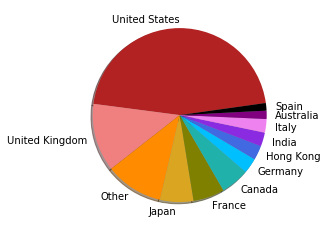

In [40]:
#PIE CHARTS
#create pie chart
plt.pie(count, explode=explode, labels=countries, colors=colors, shadow=True, startangle=8)